In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_039b58be4c9b4d838bc53e28f04576ff = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='5aTNWzG2Xj0Z9BWVT9o5bGankSHfW0IMZmn1nQRsGUPS',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_039b58be4c9b4d838bc53e28f04576ff.get_object(Bucket='analysisforfoodinsecurityinindia-donotdelete-pr-23eqkxd5ldlky7',Key='avail.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data= pd.read_csv(body)
data.head()



,Year,Land(%),Rice prod,wheat prod,Rice imp,wheat imp,cereal prod,people drinking water,Undernourishment,Stocks(MT),Pop density,availability(g/capita/day),quality,cal per cap,MSP/100Kg(Wheat),Annual rainfall
0,2001,60.704832,139900000,69680896,63,1351.0,242963796,80.9,19.4,414.57,360.379880,45,NaN,2333,620,1105.2
1,2002,60.729385,107730304,72766304,872,39150.0,206636708,81.4,21.0,414.57,366.544725,45,NaN,2285,620,981.9
2,2003,60.624783,132789000,65760800,339,35097.0,236592700,81.9,22.2,414.57,372.673071,45,NaN,2282,630,1243.6
3,2004,60.667162,124697104,72156200,0,101075.0,229845504,82.4,22.8,414.57,378.763475,45,NaN,2256,640,1080.5
4,2005,60.583414,137690096,68636896,256,37760.0,239997492,82.9,22.2,214.56,384.811826,46,NaN,2270,700,1208.3


In [3]:

drop = ['quality','cal per cap','MSP/100Kg(Wheat)','Annual rainfall','people drinking water','wheat imp']
data.drop(drop , inplace = True , axis = 1)        


In [4]:

data.isnull().any()


Year                          False
Land(%)                       False
Rice prod                     False
wheat prod                    False
Rice imp                      False
cereal prod                   False
Undernourishment              False
Stocks(MT)                    False
Pop density                   False
availability(g/capita/day)    False
dtype: bool

In [5]:
data.fillna(data.mean(),inplace = True)

In [6]:

data.isnull().any()


Year                          False
Land(%)                       False
Rice prod                     False
wheat prod                    False
Rice imp                      False
cereal prod                   False
Undernourishment              False
Stocks(MT)                    False
Pop density                   False
availability(g/capita/day)    False
dtype: bool

In [7]:
data


,Year,Land(%),Rice prod,wheat prod,Rice imp,cereal prod,Undernourishment,Stocks(MT),Pop density,availability(g/capita/day)
0,2001,60.704832,139900000,69680896,63,242963796,19.4,414.57,360.379880,45
1,2002,60.729385,107730304,72766304,872,206636708,21.0,414.57,366.544725,45
2,2003,60.624783,132789000,65760800,339,236592700,22.2,414.57,372.673071,45
3,2004,60.667162,124697104,72156200,0,229845504,22.8,414.57,378.763475,45
4,2005,60.583414,137690096,68636896,256,239997492,22.2,214.56,384.811826,46
5,2006,60.509419,139136992,69354496,162,242785588,20.7,184.09,390.818521,47
6,2007,60.413226,144570000,75806704,145,260485904,19.2,200.40,396.772907,49
7,2008,60.459305,148036000,78570200,85,266835300,18.1,293.19,402.647293,49
8,2009,60.563906,135672992,80679400,66,250783392,17.7,454.40,408.406504,50
9,2010,60.397418,143963008,80803600,95,267838308,17.5,515.60,414.026918,51


In [8]:

x = data.iloc[:,0:9].values
y = data.iloc[:,9].values


In [9]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.09, random_state = 0)


In [10]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:

ypred =regressor.predict(x_test)


In [12]:

x_test.shape



(2, 9)

In [13]:

ypred


array([ 45.15757525,  48.01743683])

In [14]:

ypred1 = regressor.predict([[2005,60.70483218,139900000,69680896,63,242963796,19.4,414.57,360.3798799]])


In [15]:

print(ypred1)


[ 25.0410759]


In [16]:

from sklearn.metrics import r2_score
r2_score(y_test,ypred)


0.87621745819579266

In [17]:
import seaborn as sns

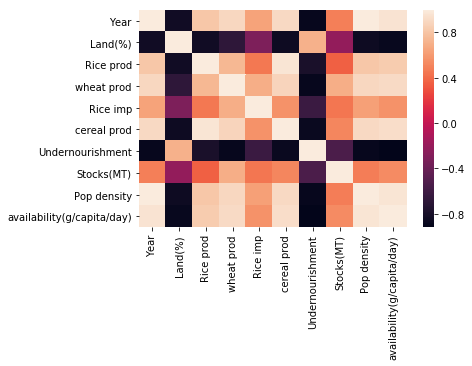

In [18]:
sns.heatmap(data.corr())

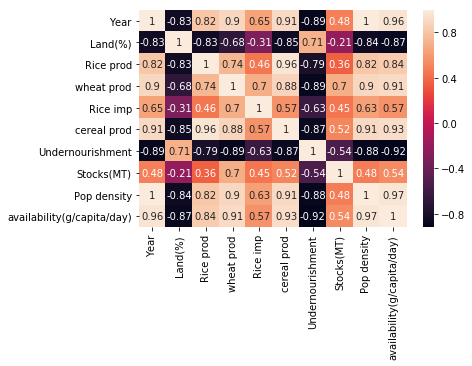

In [19]:
sns.heatmap(data.corr(),annot = True)

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [21]:

# Fitting Decision Tree regressor to the Training set
from sklearn.tree import DecisionTreeRegressor
Regressor = DecisionTreeRegressor( random_state = 0)
Regressor.fit(x_train, y_train)



DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [22]:
# Predicting the Test set results
y_pred = Regressor.predict(x_test)


In [23]:

from sklearn.metrics import r2_score
r2_score(y_test,ypred)


0.87621745819579266

In [24]:
import pickle
s=pickle.dumps(regressor)

In [25]:
from sklearn.externals import joblib
joblib.dump(regressor, 'filename.pkl')

['filename.pkl']

In [28]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [27]:
wml_credentials={
  "url": "https://eu-gb.ml.cloud.ibm.com",
  "access_key": "YVsa0AuqVslYOzVxAtAvbgIHsOQkayl8wsxbalmxpC9p",
  "username": "c395b7e9-01a5-4b1e-8c53-24e546909be0",
  "password": "14c2477a-9d90-4b63-a213-8a769217ddbd",
  "instance_id":"d20a56d2-50a5-4b8c-957d-284d619186b1"
}

In [29]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [30]:
instance_details = client.service_instance.get_details()

In [31]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "S Zenith Kumar", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "zenithsamudrala17@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Analysis for food insecurity in India"}

In [32]:
model_artifact =client.repository.store_model(regressor, meta_props=model_props)

In [33]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [34]:
client.repository.list_models()

------------------------------------  -------------------------------------  ------------------------  -----------------
GUID                                  NAME                                   CREATED                   FRAMEWORK
7431ad45-555a-4a41-b594-608683dd0f99  Analysis for food insecurity in India  2019-06-25T06:27:04.833Z  scikit-learn-0.19
------------------------------------  -------------------------------------  ------------------------  -----------------


In [35]:
loaded_model = client.repository.load(published_model_uid)

In [36]:
created_deployment = client.deployments.create(published_model_uid, name="Analysis for food insecurity in India")



#######################################################################################

Synchronous deployment creation for uid: '7431ad45-555a-4a41-b594-608683dd0f99' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='4c366b45-b47e-4252-b39a-6b3e56a615b8'
------------------------------------------------------------------------------------------------




In [37]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)

In [38]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/d20a56d2-50a5-4b8c-957d-284d619186b1/deployments/4c366b45-b47e-4252-b39a-6b3e56a615b8/online'

In [39]:
client.deployments.list()

------------------------------------  -------------------------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                                   TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
4c366b45-b47e-4252-b39a-6b3e56a615b8  Analysis for food insecurity in India  online  DEPLOY_SUCCESS  2019-06-25T06:27:46.735Z  scikit-learn-0.19  model
------------------------------------  -------------------------------------  ------  --------------  ------------------------  -----------------  -------------


In [40]:
scoring_payload = {"fields": ["a1","a2","a3","a4","a5","a6","a7","a8","a9"],"values": [[2005,60.70483218,139900000,69680896,63,242963796,19.4,414.57,360.3798799]]}

In [41]:
predictions = client.deployments.score(scoring_endpoint, scoring_payload)

In [42]:
predictions

{'fields': ['prediction'], 'values': [[25.04107589776686]]}